# Phoible explorations in language dis/similarity
[Phoible](https://phoible.github.io/) is a highly structured dataset of phonemic inventories by language.

In [124]:
import csv
import itertools
import matplotlib
import matplotlib.pyplot as plt

### Load the data

In [209]:
# Load & process dataset into a dict {<str>: <set>} mapping language IDs to sets of phonemes.
with open('phoible.csv', 'r') as f:
    reader = csv.DictReader(f)
    lang_phonemes = {}  # {id: set(phonemes)}
    langs = {}  # {id: row}
    all_phonemes = set()

    for row in reader:
        idx = row['InventoryID']
        if idx not in lang_phonemes:
            lang_phonemes[idx] = set()
        lang_phonemes[idx].add(row["Phoneme"])
        langs[idx] = row
        all_phonemes.add(row["Phoneme"])

### Quick overview

In [200]:
# Check the dataset format
print("%d languages" % len(lang_phonemes))
print("\nCSV field names:", reader.fieldnames)

3020 languages

CSV field names: ['InventoryID', 'Glottocode', 'ISO6393', 'LanguageName', 'SpecificDialect', 'GlyphID', 'Phoneme', 'Allophones', 'Marginal', 'SegmentClass', 'Source', 'tone', 'stress', 'syllabic', 'short', 'long', 'consonantal', 'sonorant', 'continuant', 'delayedRelease', 'approximant', 'tap', 'trill', 'nasal', 'lateral', 'labial', 'round', 'labiodental', 'coronal', 'anterior', 'distributed', 'strident', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'retractedTongueRoot', 'advancedTongueRoot', 'periodicGlottalSource', 'epilaryngealSource', 'spreadGlottis', 'constrictedGlottis', 'fortis', 'raisedLarynxEjective', 'loweredLarynxImplosive', 'click']


Text(0.5, 0, 'phoneme inventory size')

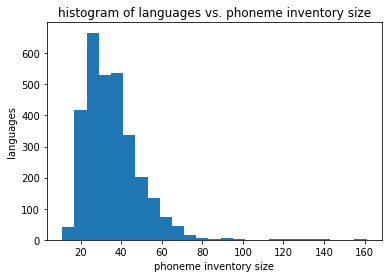

In [201]:
# Quick visualization overview
fig, ax = plt.subplots()
ax.hist([len(ps) for ps in lang_phonemes.values()], bins=25)
ax.set_title("histogram of languages vs. phoneme inventory size")
ax.set_ylabel("languages")
ax.set_xlabel("phoneme inventory size")

### Convenience methods

In [241]:
def get_lang_name(idx, use_dialect_name=False):
    la = langs[idx].get('LanguageName')
    di = langs[idx].get('SpecificDialect')
    if use_dialect_name is False or di in la:
        return la
    return "%s (%s)" % (la, di)

def prettyf_lang(idx, ps):
    '''Return pretty print string'''
    return "{0} [{1}]".format(
        get_lang_name(idx, use_dialect_name=True),
        len(ps)
    )

## Let's ask some questions!

In [229]:
# Question: Which languages have the smallest and largest phonemic inventories?
sorted_langs = sorted(lang_phonemes.items(), key=lambda tup: len(tup[1]), reverse=True)

print(prettyf_lang(*sorted_langs[0]))
print(sorted_langs[0][1])

idx, ps = sorted_langs[-1]
print(prettyf_lang(*sorted_langs[-1]))
print(sorted_langs[-1][1])

!Xóõ (NA) [161]
{'ɡʘkʰ', 'kʘ', 'uˤ', 'kǁh', 'pʼkxʼ', 'ɡʘ', 'tx', 'ɲ', 'i', 'ɡǃkʰ', 'kǁʰ', 'kʰ', 'kʼ', 'kǀkxʼ', 'kǃʔ', 'kǀʰ', 'aᴱ', 't̪ʼ', '˨', 'kǁʔ', 'ɢǃ', 'oˤ', 'qǀʼ', '˧', 'a̤', 'ḛ', 'ɡǃ', 'd̪x', 'kǃkxʼ', 'ɡǁkxʼ', 'qʘʼ', 'tʼ', 'kǀx', 'ʔŋǂ', 'kǁ', 'kǂh', 'ŋǁ', 'd̪ʼkxʼ', 'qʰ', 'ŋǂ', 'kʘkxʼ', 'pʰ', 'ʔŋʘ', 'ɢ', 'ˀm', 'kǀ', 'e̤', 'kǁkxʼ', 'ḭ', 'ʔŋǃ', 'ˀn', 'b', 'kʘʰ', 'ɢʱ', 'ɡǀ', 'n̪', 'ʔ', 't̪ʰ', 'kǂ', 'ɡ', 'a', 'ɡǁkʰ', 'ɡʱ', 'ɡǃkxʼ', 'ŋ̊ǂ', 'ɢʘ', 'e', 'dʼkxʼ', 'ɡǂ', 'ɡǀkʰ', 'k', 'tʰ', 'ɡǃx', 'kǀh', 'kǁx', 'kǃx', 'kǂkxʼ', 'ɡʘkxʼ', 'o', 'd̪ʱ', 'qʘ', 'dʱ', 'd', 'qǃʼ', 'ɢǃqʰ', 'kǂʔ', 'i̤', 'u', 'qǂʼ', 'õ', 'ṵ', 'ŋ̊ʘ', 'ŋ̊ǃ', 'kǂʰ', 'kʘʔ', 'o̤', 'ŋʘ', 'f', 'ɡǂkʰ', 'ṳ', 'ŋ̊ǁ', 'ɡǁ', 'ɸ', 'h', '˦', 'qǃ', 'ɢǂ', 'qǀ', 'ũ', 'l', 'ŋǀ', 'ɢǀ', 'ẽ', 'ŋǃ', 'ʔŋǁ', 'ɢǁqʰ', 'd̪', 'ɡǀx', 'x', 'dx', 'p', 'ɡǂx', 'ɢǁ', 'oᴱ', 't̪', 't', 'kʘh', 'qǁʼ', 'a̰', 'ɢǀqʰ', 'ɡʘx', 'kǃʰ', 'eˤ', 'kxʼ', 'qǁ', 'kǀʔ', 'ĩ', 'qǂ', 'iˤ', 'ɟ', 'qʼ', 's', 'ɡǀkxʼ', 'o̰', 'ɡǁx', 'uᴱ', 't̪ʼkxʼ', 'kǃ', 't̪x', 'ŋ̊ǀ', 'ɡʼkxʼ

In [263]:
# Question: What pair of langs has the maximum phoneme union?
# (What pair of languages would you theoretically teach a baby
#  to give them the largest inventory of distinct phonemes?)
max_union_pair = max(
    itertools.combinations(lang_phonemes.items(), 2),
    key=lambda ps: len(ps[0][1].union(ps[1][1]))
)
(iso1, iso2) = (max_union_pair[0][0], max_union_pair[1][0])
(ps1, ps2) = (max_union_pair[0][1], max_union_pair[1][1])
print("Max union pair: %s and %s. Union = %d phonemes" % \
      (prettyf_lang(*max_union_pair[0]), prettyf_lang(*max_union_pair[1]), len(ps1.union(ps2))))

Max union pair: !Xóõ (NA) [161] and Kildin Saami (NA) [128]. Union = 274 phonemes


In [214]:
# Question: What pair of langs has the maximum phoneme intersection?
# (What pair of languages has the largest volume of overlap?)
# (Note that this is a different question from "what langs overlap
#  by the largest *percentage* of their inventories?")

# It's ok to lazily take all pairwise combos, ~9M
max_intersect_pair = max(
    itertools.combinations(lang_phonemes.items(), 2),
    key=lambda ps: len(ps[0][1].intersection(ps[1][1]))
)

In [230]:
(ps1, ps2) = (max_intersect_pair[0][1], max_intersect_pair[1][1])
print("Max intersected pair: %s and %s. Intersection = %d phonemes" % \
      (prettyf_lang(*max_intersect_pair[0]), prettyf_lang(*max_intersect_pair[1]), len(ps1.intersection(ps2))))

Max intersected pair: Kanga (Kanga) [76] and Kanga (Kufa) [75]. Intersection = 74 phonemes


In [232]:
# Questions: What pair(s) of langs have maximal similarity?
# Are any complete subsets of another lang?

# Takes a nested tuple ((idx1, phonemes1), (idx2, phonemes2))
get_similarity_index = lambda ps: max(
    len(ps[0][1].intersection(ps[1][1]))/len(ps[0][1])*1.0,
    len(ps[0][1].intersection(ps[1][1]))/len(ps[1][1])*1.0
)

most_sim = sorted(
    itertools.combinations(lang_phonemes.items(), 2),
    key=get_similarity_index,
    reverse=True
)

In [233]:
max_sim_ind = get_similarity_index(most_sim[0])
num_max_sim_pairs = sum(
    1 for ps in most_sim
    if get_similarity_index(ps) == max_sim_ind
)

In [234]:
print("%d pairs found with %.2f similarity" % (num_max_sim_pairs, max_sim_ind))
print("\tSampling a few of them:")
for ps in most_sim[:5]:
    sim_ind = get_similarity_index(ps)
    if sim_ind < max_sim_ind:
        break
    if len(ps[0][1]) > len(ps[1][1]):
        print(prettyf_lang(*ps[0]), prettyf_lang(*ps[1]))
    else:
        print(prettyf_lang(*ps[1]), prettyf_lang(*ps[0]))
    print("\toverlap:", ps[0][1].intersection(ps[1][1]))

13975 pairs found with 1.00 similarity
	Sampling a few of them:
Kota (NA) [34] KOTA (NA) [28]
	overlap: {'pʰ', 'j', 'ɭ', 'i', 'kʰ', 'v', 'n', 'd', 'b', 'd̠ʒ', 'ʂ', 'e̞', 't̠ʃʰ', 'ɳ', 'u', 't̪ʰ', 'ɡ', 'ʈʰ', 'a', 'l', 'm', 'ŋ', 'o̞', 'tʰ', 'ɽ', 'd̪', 'r', 'ɖ'}
Sedang (NA) [53] Ainu (NA) [17]
	overlap: {'m', 'w', 'j', 't̠ʃ', 'p', 's', 'a', 'ɛ', 'i', 'h', 'k', 't', 'ʔ', 'u', 'n', 'ɔ', 'r'}
Sedang (NA) [53] Southern Nuautl (NA) [17]
	overlap: {'m', 'w', 'j', 'a', 'p', 's', 'l', 'i', 'h', 'k', 't', 'ʔ', 'u', 'n', 'o', 'r', 'e'}
Yao (NA) [49] Orokaiva (NA) [17]
	overlap: {'m', 'b', 'a', 'p', 's', 'ŋ', 'i', 'h', 'k', 't', 'dz', 'u', 'ɡ', 'n', 'd', 'o', 'e'}
Yao (NA) [49] Samo (NA) [18]
	overlap: {'m', 'b', 'w', 'j', 'a', 'f', 's', 'l', 'i', 'h', 'k', 't', 'e', 'u', 'd', 'ɔ', 'o', 'ɡ'}


In [337]:
# Question: What langs are a strict phonemic subset of American English?
# (In other words, what languages could I easily pronounce?)

american_dialects = list(idx for idx, la in langs.items() if "American" in la['LanguageName'])
print(american_dialects)
print(
    get_similarity_index((("2175", lang_phonemes["2175"]),("2176", lang_phonemes["2176"])))
)
for idx in american_dialects:
    am_ps = (idx, lang_phonemes[idx])
    most_sim = sorted(
        map(
            lambda ps: {"idx": ps[0], "phonemes": ps[1], "similarity": get_similarity_index((ps, am_ps))},
            lang_phonemes.items(),
        ),
        key=lambda d: d["similarity"],
        reverse=True,
    )
    print(idx, get_lang_name(idx, use_dialect_name=True), "- most similar:")
    for d in most_sim[:10]:
        print("\t%s %s - similarity %.2f" % (
            d["idx"],
            get_lang_name(d["idx"], use_dialect_name=True),
            get_similarity_index((am_ps, (d["idx"], d["phonemes"])))
        ))

['2175', '2176']
0.8717948717948718
2175 English (American) (Western and Mid-Western US; Southern California) - most similar:
	2175 English (American) (Western and Mid-Western US; Southern California) - similarity 1.00
	2176 American English (Southeastern Michigan) - similarity 0.87
	2252 English (English (RP)) - similarity 0.85
	2178 English (British) (Liverpool) - similarity 0.79
	160 English (NA) - similarity 0.72
	2180 English (British) (Tyneside English (spoken in Newcastle)) - similarity 0.72
	1272 kwangari (NA) - similarity 0.70
	172 Persian (NA) - similarity 0.70
	2177 English (Australian) (NA) - similarity 0.69
	2338 Burmese (Burmese (Rangoon)) - similarity 0.69
2176 American English (Southeastern Michigan) - most similar:
	2176 American English (Southeastern Michigan) - similarity 1.00
	2175 English (American) (Western and Mid-Western US; Southern California) - similarity 0.87
	2252 English (English (RP)) - similarity 0.79
	2178 English (British) (Liverpool) - similarity 0.77

In [336]:
# American English x Persian overlap
persian = lang_phonemes["172"]
print(len(persian), persian)
print(len(lang_phonemes["2175"].intersection(persian)))

kwangari = lang_phonemes["1272"]
print(len(kwangari), kwangari)
print(len(lang_phonemes["2175"].intersection(kwangari)))

30 {'w', 'pʰ', 'j', 't̠ʃ', 'ʒ', 'ɢ', 'i', 'kʰ', 'v', 'n', 'd', 'b', 'd̠ʒ', 'z', 'ʃ', 'ɑ', 'ʔ', 'u', 'ɡ', 'f', 's', 'h', 'a̟', 'l', 'm', 'e', 'χ', 'tʰ', 'o', 'r'}
21
27 {'w', 'j', 't̠ʃ', 'p', 'ɲ', 't', 'v', 'n', 'd', 'b', 'd̠ʒ', 'ʃ', 'ɡ', 'a', 'f', 's', 'ɛ', 'h', 'l', 'm', 'ɪ', 'ʊ', 'β', 'ŋ', 'k', 'ɔ', 'r'}
19


## Linguistic observation

It's clear that the simple aggregates and set operations above don't tell us much of the story if used to evaluate linguistic similarity. They don't line up well with human intuitions for linguistic similarity, even phonetically (putting aside grammar and [phonotactics](https://en.wikipedia.org/wiki/Phonotactics)).

[David J. Peterson](https://artoflanguageinvention.com/) claims that if a language contains a phoneme which is rare amongst languages, it will frequently maximize listener comprehension by using that phoneme quite a lot, making that phoneme (or class of phonemes) characteristic of the language. Examples include:
- American English's [rhotic r](https://en.wikipedia.org/wiki/Rhoticity_in_English) (`[r]`, "**r**ed")
- Hindi's retroflex t (`[ʈ]`, टापू [ʈaːpuˑ])
- [ǃXóõ](https://omniglot.com/writing/taa.htm)'s heavy use of click consonants

So, given a dataset of phonemes weighted by frequency of use or phonotactic "importance" in the language, we might be able to better calculate an intuition-aligned dis/similarity index.

## In closing

I don't feel like I learned much about language similarity here, but I learned a lot about how vast the differences in phonemic inventories can be across languages. This was a fun exploration!

Although the questions I had weren't a great fit for the data and didn't do it justice, this is a wonderfully structured dataset and I'm excited to use it more in the future.

In terms of code, `pandas` might be a better fit for querying next time, though I just used vanilla Python because I'm comfortable with it.